In [ ]:
!wget https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0

In [ ]:
!unzip CovidDataset-20200427T133042Z-001.zip\?dl\=0

In [3]:
import keras 
from keras.preprocessing import image 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

In [4]:
from keras.preprocessing.image import ImageDataGenerator
import os
main_dir = "/content/CovidDataset"
train_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_data = ImageDataGenerator(rescale=1./255)

train_dir = os.path.join(main_dir, "Train")
training_set = train_data.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_dir = os.path.join(main_dir, "Val")
test_set = test_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'

)


Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [5]:
model=Sequential()

model.add(Conv2D(96,kernel_size=(11,11),strides=4,activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))

model.add(Conv2D(256,kernel_size=(5,5),strides=1,padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))

model.add(Conv2D(384,kernel_size=(3,3),strides=1,padding='SAME',activation='relu'))
model.add(Conv2D(384,kernel_size=(3,3),strides=1,padding='SAME',activation='relu'))
model.add(Conv2D(256,kernel_size=(3,3),strides=1,padding='SAME',activation='relu'))

model.add(MaxPooling2D(pool_size=(3,3),strides=2))

model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='softmax'))


In [6]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 384)       1

In [7]:
results=model.fit_generator(
    training_set,
    epochs=20,
    validation_data=test_set,
    validation_steps=1,
    callbacks = [EarlyStopping(monitor = 'val_accuracy', patience = 20)]
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
7/7 [==============================] - 19s 1s/step - loss: 0.7636 - accuracy: 0.4554 - val_loss: 0.6927 - val_accuracy: 0.6875
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 0.6948 - accuracy: 0.4598 - val_loss: 0.6910 - val_accuracy: 0.6250
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.6936 - accuracy: 0.4732 - val_loss: 0.6933 - val_accuracy: 0.4062
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.6935 - accuracy: 0.4866 - val_loss: 0.6921 - val_accuracy: 0.5625
Epoch 5/20
7/7 [==============================] - 10s 2s/step - loss: 0.6934 - accuracy: 0.5089 - val_loss: 0.6763 - val_accuracy: 0.5625
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.6878 - accuracy: 0.5536 - val_loss: 0.6363 - val_accuracy: 0.5938
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.7044 - accuracy: 0.6161 - val_loss: 0.6842 - val_accuracy: 0.6250
Epoch 8/20
7/7 [=======================

In [8]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Training and Validation loss')

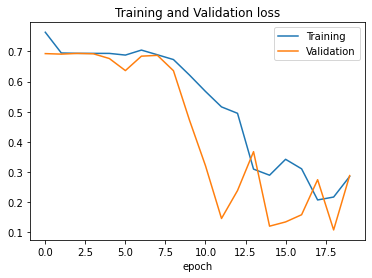

In [9]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['Training','Validation'])
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation accuracy')

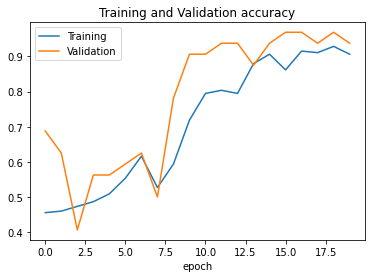

In [10]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['Training','Validation'])
plt.title('Training and Validation accuracy')

In [11]:
test_loss, test_acc = model.evaluate(test_set)
print('test loss :{}   test accuracy :{}'.format(test_loss,test_acc))

2/2 [==============================] - 2s 2s/step - loss: 0.1954 - accuracy: 0.9667
test loss :0.19544315338134766   test accuracy :0.9666666388511658


In [12]:

model.save('XRay_Model.h5')

In [13]:
from keras.saving.save import load_model
new_model=load_model('/content/XRay_Model.h5')

In [50]:
import numpy as np
img_path='/content/xray/normal/7ab085a73b94836516c9d51f5a148c_jumbo.jpeg'
img=image.load_img(img_path,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=new_model.predict(x)

covid=pred[0][0]
normal=pred[0][1]
if covid==1 and normal==0:
  print('the person has covid 19')
else:
  print('the person is normal')  

the person is normal
